In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

**Pair Programming Limpieza III**

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis:

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex.

Si reducimos esto a una tabla para saber que tenemos ya limpito y que no.

**Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

variable
¿Está limpia?

age
✔️ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad

species
✔️ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes

country
✔️ los paises están en mayúsculas, algunos se repiten con algunos cambios

fatal
✔️ la limpiamos en el pair de Pandas V

year
✔️ es una columna de tipo float deberíamos convertirla a integer

sex
✔️ la limpiamos en el pair de Pandas V

fecha
✔️ la limpiamos en el pair de Pandas V

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. 

In [2]:
df = pd.read_csv("limpieza_dos.csv", index_col = 0)
df.head()

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,57,White shark,NaN,N,white,7.0
1,2018,brazil,M,18,Tiger shark,NaN,N,Tiger,8.0
2,2018,usa,M,15,"Bull shark, 6'",NaN,N,Bull,5.0
3,2018,australia,M,32,Grey reef shark,NaN,N,Grey,2.0
4,2018,england,M,21,Invalid incident,NaN,N,Desconocido,1.0


En este ejercicio tendremos que limpiar los outliers:

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [3]:
# sobre las numéricas.
df.dtypes
# year y edad_limpia

YEAR               int64
COUNTRY           object
SEX_              object
AGE               object
SPECIES_          object
fecha             object
FATALIDAD         object
nueva_especie     object
edad_limpia      float64
dtype: object

2. Identifica visualmente los outliers.

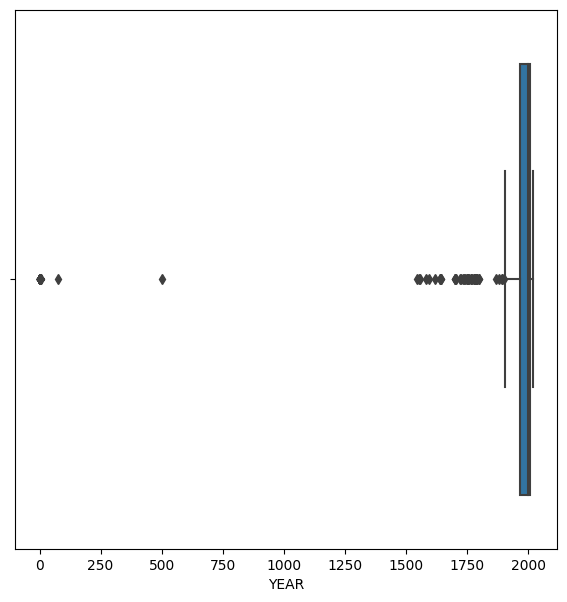

In [23]:
plt.figure (figsize =(7,7))
fig = sns.boxplot(x = "YEAR", data = df);

In [ ]:
#tiene los 

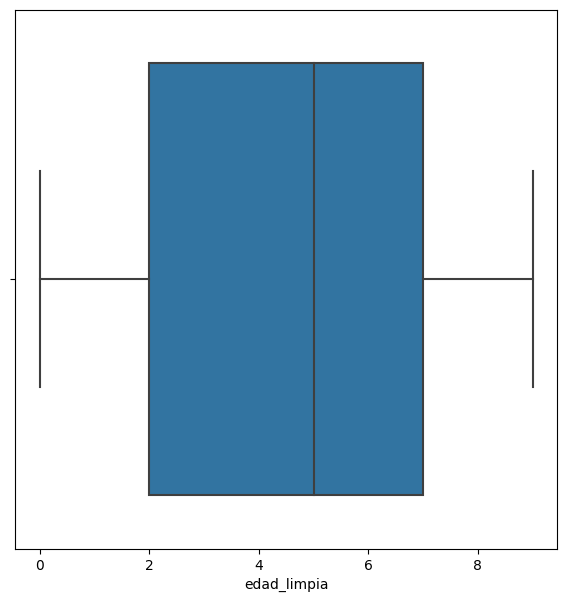

In [24]:
plt.figure (figsize =(7,7))
fig = sns.boxplot(x = "edad_limpia", data = df);

3. Identifica sobre el dataframe las filas que son outliers.

In [25]:
dicc_indices = {}

In [27]:
def outliers_col (col): 
        
    Q1 = np.nanpercentile(df[col], 25)
    Q3 = np.nanpercentile(df[col], 75)
        
    IQR = Q3 - Q1
        
    outlier_step = 1.5 * IQR
        
    outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
    if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
        dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

**year**

In [33]:
dicc_year = outliers_col("YEAR")
print (dicc_year)

{'YEAR': [1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1562, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1572, 1573, 1574, 1575, 1577, 1578, 1579, 1582, 1583, 1585, 1586, 1588, 1589, 1590, 1591, 1593, 1594, 1595, 1596, 1598, 1602, 1604, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1616, 1617, 1618, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1632, 1635, 1636, 1637, 1639, 1640, 1641, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1657, 1661, 1670, 1671]}


**edad limpia**

In [34]:
dicc_edad_limpia = outliers_col("edad_limpia")
print (dicc_edad_limpia)

{'YEAR': [1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1562, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1572, 1573, 1574, 1575, 1577, 1578, 1579, 1582, 1583, 1585, 1586, 1588, 1589, 1590, 1591, 1593, 1594, 1595, 1596, 1598, 1602, 1604, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1616, 1617, 1618, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1632, 1635, 1636, 1637, 1639, 1640, 1641, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1657, 1661, 1670, 1671]}


4. Reemplaza los outliers por el estadístico más correcto.

**year**

In [35]:
#lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in dicc_year.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [37]:
df

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018.00000,usa,F,57,White shark,NaN,N,white,7.0
1,2018.00000,brazil,M,18,Tiger shark,NaN,N,Tiger,8.0
2,2018.00000,usa,M,15,"Bull shark, 6'",NaN,N,Bull,5.0
3,2018.00000,australia,M,32,Grey reef shark,NaN,N,Grey,2.0
4,2018.00000,england,M,21,Invalid incident,NaN,N,Desconocido,1.0
...,...,...,...,...,...,...,...,...,...
1649,1983.33638,south africa,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1657,1983.33638,fiji,NaN,NaN,NaN,NaN,Y,Desconocido,NaN
1661,1983.33638,asia?,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1670,1983.33638,panama,NaN,NaN,NaN,NaN,Y,Desconocido,NaN


**edad limpia**

In [36]:
#lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in dicc_edad_limpia.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [38]:
df

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018.00000,usa,F,57,White shark,NaN,N,white,7.0
1,2018.00000,brazil,M,18,Tiger shark,NaN,N,Tiger,8.0
2,2018.00000,usa,M,15,"Bull shark, 6'",NaN,N,Bull,5.0
3,2018.00000,australia,M,32,Grey reef shark,NaN,N,Grey,2.0
4,2018.00000,england,M,21,Invalid incident,NaN,N,Desconocido,1.0
...,...,...,...,...,...,...,...,...,...
1649,1983.33638,south africa,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1657,1983.33638,fiji,NaN,NaN,NaN,NaN,Y,Desconocido,NaN
1661,1983.33638,asia?,NaN,NaN,NaN,NaN,N,Desconocido,NaN
1670,1983.33638,panama,NaN,NaN,NaN,NaN,Y,Desconocido,NaN


5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [39]:
df.to_csv("limpieza_tres.csv")